In [2]:
import sys
sys.path.append("../")
sys.path.append("../../algorithms/ga")

In [3]:
import numpy as np
from datetime import datetime
import tsplib95 as tsp

In [4]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

In [5]:
from tsp_problem import TSP_Problem
from population import Population
from ga import GA

## Problem Qatar
**(optimal tour for the qa194 TSP has length 9352)**. From http://www.math.uwaterloo.ca/tsp/world/qatour.html

### A function to plot
This function plot the fitness of the solution as a function of the number of iteration

In [6]:
def plot_runs(runs, title="title", figsize=(10, 12)):
    '''
    Plot best_fitness = f(fevals) for 10 runs

    Parameters
    ----------
    - logs: A python list: log of 10 runs for
        an optimisation problem. for each run:
        * logs of a run is run[0]
        * duration of run is run[1]
        * best_fitness of run is run[2]
        * best_solution of run is run[3]
    - title: the title of the plot!
    '''

    # Build the plot
    fig, ax = plt.subplots(figsize=figsize)
    plt.axes(ax)
    colors = iter(cm.rainbow(np.linspace(0, 1, len(runs))))
    run_id = 0
    for run in runs:
        run_id = run_id + 1
        color = next(colors)
        duration = "{0}mn:{1}s".format(run[1].seconds//60,
                                       run[1].seconds % 60)

        run_best_fitness = "{0}".format(run[2])
        iteration_best_fitness = [log[1] for log in run[0]]
        x = np.arange(len(iteration_best_fitness))
        
        plt.plot(x, iteration_best_fitness, "k--", color=color,
                 label="run {0:>2}: {1}, best fitness fit={2}".
                 format(run_id, duration, run_best_fitness))

    # Set y lim if required, title and labels
    ax.set_title(title)
    ax.set_xlabel("number of iteration", fontsize=12)
    ax.set_ylabel("best fitness", fontsize=12)
    ax.legend()

### Loading problem

In [7]:
qatar = tsp.load("./data/qa194.tsp")

### Let's look at some cities coordinate

In [8]:
qatar_cities = np.array([qatar.node_coords[city] for city in list(qatar.get_nodes())])
qatar_cities[:2]

array([[24748.3333, 50840.    ],
       [24758.8889, 51211.9444]])

### Create our TSP problem

In [9]:
qatar_pb = TSP_Problem("qa194", qatar_cities)

### Run 10 instances of GA for our problem

In [11]:
population_size = 300
nb_generation = 200
elite_ratio=0
selection_op="tournament"
selection_params={"K": 2}
crossover_op="ordered"
crossover_params={"crossover_proba": 0.9, "sequence_max_width": 10}
mutation_op="scramble"
mutation_params={"mutation_proba": 0.1, "sequence_max_width": 5}

In [12]:
verbose=True
runs = []
for run_id in range(5):
    # re-initialise the problem
    # i.e. to get different (random)
    # initial solution
    solutions = Population(qatar_pb, population_size)
    algo = GA(solutions, nb_generation=nb_generation, elite_ratio=elite_ratio,
          selection_op=selection_op, selection_params=selection_params,
          crossover_op=crossover_op, crossover_params=crossover_params,
          mutation_op=mutation_op, mutation_params=mutation_params)
    startt = datetime.now()
    algo.run()
    duration = (datetime.now() - startt)
    runs.append([solutions.logs, duration, int(solutions.best_fitness), solutions.best_individual])
    if verbose:
        print("run {0:2} -> duration: {1}mn:{2}s, best_fitness: {3}".
              format(run_id, duration.seconds//60, duration.seconds%60, int(solutions.best_fitness)))

run  0 -> duration: 5mn:25s, best_fitness: 43649
run  1 -> duration: 5mn:32s, best_fitness: 44458
run  2 -> duration: 5mn:26s, best_fitness: 44225
run  3 -> duration: 5mn:28s, best_fitness: 44106
run  4 -> duration: 5mn:28s, best_fitness: 40863


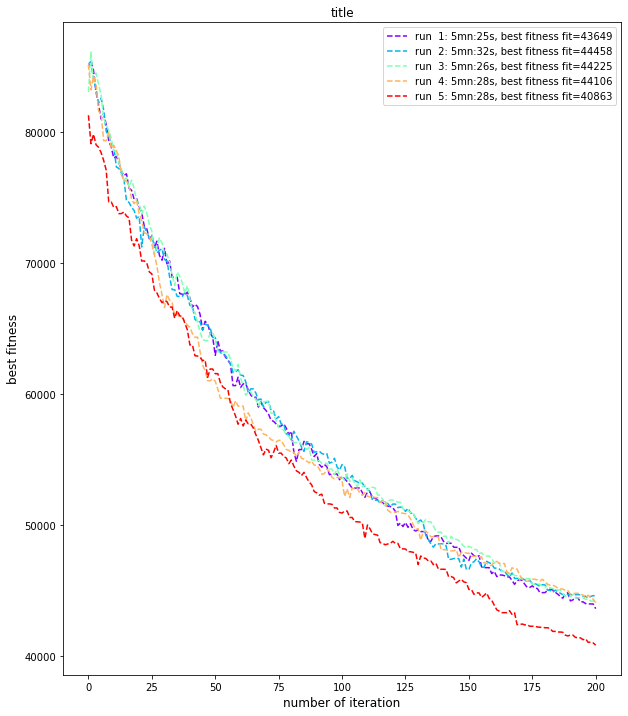

In [13]:
plot_runs(runs, title="title", figsize=(10, 12))

### Get the best overall solution

In [14]:
best_fitness = np.inf
for run in runs:
    if run[2] < best_fitness:
        best_fitness = run[2]
        best_solution = run[3]

In [15]:
path = best_solution.tolist()
path.append(path[0])
print("The best path is : \n{0}".format(path))
print("This path is {0} (distance of unit) long".format(best_fitness))

The best path is : 
[185, 193, 162, 167, 143, 7, 64, 49, 40, 30, 35, 51, 70, 6, 20, 156, 123, 148, 166, 154, 137, 146, 132, 141, 168, 151, 175, 170, 188, 158, 133, 135, 106, 88, 98, 13, 109, 117, 108, 60, 69, 23, 57, 61, 38, 24, 27, 47, 17, 14, 72, 76, 71, 82, 62, 104, 121, 105, 80, 11, 4, 36, 85, 65, 90, 147, 176, 194, 179, 140, 142, 122, 160, 180, 187, 183, 153, 94, 59, 16, 5, 15, 45, 58, 84, 101, 8, 2, 22, 116, 186, 164, 161, 155, 125, 145, 111, 138, 165, 177, 144, 169, 149, 96, 28, 25, 92, 93, 91, 87, 75, 118, 44, 54, 43, 66, 56, 32, 29, 19, 77, 95, 173, 174, 178, 119, 130, 113, 81, 97, 67, 37, 21, 53, 48, 55, 3, 12, 10, 31, 34, 26, 41, 68, 50, 42, 52, 107, 102, 114, 126, 139, 110, 33, 79, 78, 9, 73, 18, 89, 99, 1, 86, 63, 182, 163, 150, 157, 181, 192, 172, 189, 171, 184, 191, 190, 127, 134, 131, 128, 115, 124, 136, 120, 112, 100, 39, 46, 103, 74, 83, 129, 152, 159, 185]
This path is 40863 (distance of unit) long
